# Content Performance Analysis: What Makes Data Stories Go Viral?

**Project Overview:**


This project analyzes viral content patterns on Reddit's r/dataisbeautiful community to understand what drives engagement in data storytelling. The insights generated can inform content marketing strategies and help creators 
optimize their data-driven content for maximum reach.


**Business Problem:**

Content creators and marketing teams need to understand:

Which topics resonate most with data-focused audiences?
Does creating original content vs. sharing existing content make a difference?
What emotional tone drives the highest engagement?
How does title length impact content performance?
What patterns exist in truly viral data content?

In [45]:
#Installing packages
!pip install requests beautifulsoup4 pandas matplotlib seaborn

print("Packages installed successfully!")

Packages installed successfully!


In [46]:
#Import all libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("All libraries imported!")
print("Ready to start scraping!")

All libraries imported!
Ready to start scraping!


In [47]:
#Test if I can connect to Reddit
url = "https://old.reddit.com/r/dataisbeautiful/"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}

response = requests.get(url, headers=headers)
print(f"Status code: {response.status_code}")

if response.status_code == 200:
    print("Successfully connected to Reddit!")
    print(f"Page content length: {len(response.content)} characters")
else:
    print("Connection failed. We might need to adjust our approach.")

Status code: 200
Successfully connected to Reddit!
Page content length: 351797 characters


In [23]:
# Cell 4: Let's see what we got from Reddit
soup = BeautifulSoup(response.content, 'html.parser')

# Let's look at the page title to confirm we're in the right place
page_title = soup.find('title').text
print(f"Page title: {page_title}")

# Let's see the first 500 characters of the page
print("\nFirst 500 characters of the page:")
print(response.text[:500])

Page title: DataIsBeautiful

First 500 characters of the page:
<!doctype html><html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"><head><title>DataIsBeautiful</title><meta name="keywords" content=" reddit, reddit.com, vote, comment, submit " /><meta name="description" content="DataIsBeautiful is for visualizations that effectively convey information. Aesthetics are an important part of information visualization, but..." /><meta name="referrer" content="always"><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><link type="ap


In [48]:
# Cell 5: Find the first post
# Reddit posts are in 'div' tags with class 'thing'
first_post = soup.find('div', class_='thing')

if first_post:
    print("Found a post!")
    
    # Let's try to find the title
    title_element = first_post.find('a', class_='title')
    if title_element:
        title = title_element.text.strip()
        print(f"Post title: {title}")
    else:
        print("Couldn't find title")
        
else:
    print("No posts found - we might need to adjust our search")

Found a post!
Post title: [Topic][Open] Open Discussion Thread — Anybody can post a general visualization question or start a fresh discussion!


In [25]:
# Cell 6: Find all posts and see what we get
all_posts = soup.find_all('div', class_='thing')

print(f"Total posts found: {len(all_posts)}")
print("\nFirst 5 post titles:")
print("-" * 50)

for i, post in enumerate(all_posts[:5]):
    title_element = post.find('a', class_='title')
    if title_element:
        title = title_element.text.strip()
        print(f"{i+1}. {title}")
    else:
        print(f"{i+1}. [No title found]")

Total posts found: 30

First 5 post titles:
--------------------------------------------------
1. [Topic][Open] Open Discussion Thread — Anybody can post a general visualization question or start a fresh discussion!
2. [Topic][Open] Open Discussion Thread — Anybody can post a general visualization question or start a fresh discussion!
3. [OC] Birth Rates Across Europe
4. Don’t just beat them, give them nightmares. Be Scary Good.
5. [OC]Mapping America’s Most Desolate Areas by Distance from Costco and Sam’s Club


In [26]:
# Cell 7: Let's try to extract upvotes from the first real post
# Skip the pinned post (usually index 0) and try the next ones
for i, post in enumerate(all_posts[1:6]):  # Try posts 1-5
    title_element = post.find('a', class_='title')
    
    if title_element:
        title = title_element.text.strip()
        
        # Try to find upvotes (score)
        score_element = post.find('div', class_='score unvoted')
        if score_element:
            score = score_element.text.strip()
            print(f"Post {i+1}: {title[:50]}...")
            print(f"  Upvotes: {score}")
            print("-" * 40)
            break  # Stop after finding one with upvotes
        else:
            print(f"Post {i+1}: No score found for this post")

Post 1: [Topic][Open] Open Discussion Thread — Anybody can...
  Upvotes: 0
----------------------------------------


In [ ]:
# Cell 8: Filter out discussion threads and get real data visualization posts
# We need to separate actual data visualizations from community discussion posts
# Discussion threads and announcements aren't relevant for our viral content analysis

all_posts = soup.find_all('div', class_='thing')
print(f"Total posts found: {len(all_posts)}")
print("\nFiltering out discussion threads...")
print("-" * 50)

real_data_posts = []

for i, post in enumerate(all_posts):
   title_element = post.find('a', class_='title')
   if title_element:
       title = title_element.text.strip()
       
       # Skip discussion threads and announcements - these aren't data content
       # We're looking for actual visualizations, not meta-discussions about the subreddit
       if not any(keyword in title.lower() for keyword in ['[topic]', '[open]', 'discussion thread', 'announcement']):
           real_data_posts.append(post)
           print(f"{len(real_data_posts)}. {title}")
           
           # Stop after finding 10 good posts for initial testing
           # We'll scale this up later when we scrape all sections
           if len(real_data_posts) >= 10:
               break

print(f"\nFound {len(real_data_posts)} real data visualization posts!")

In [28]:
# Cell 9: Now let's extract upvotes and comments from these real posts
post_data = []

for i, post in enumerate(real_data_posts[:5]):  # Just test with first 5
    title_element = post.find('a', class_='title')
    title = title_element.text.strip()
    
    # Get upvotes
    score_element = post.find('div', class_='score unvoted')
    if score_element:
        score_text = score_element.text.strip()
        print(f"Raw score text: '{score_text}'")
    else:
        score_text = "0"
    
    # Get comments
    comments_element = post.find('a', class_='comments')
    if comments_element:
        comments_text = comments_element.text.strip()
        print(f"Raw comments text: '{comments_text}'")
    else:
        comments_text = "0 comments"
    
    print(f"\nPost: {title[:60]}...")
    print(f"Score: {score_text}")
    print(f"Comments: {comments_text}")
    print("-" * 80)

Raw score text: '269'
Raw comments text: '131 comments'

Post: [OC] Birth Rates Across Europe...
Score: 269
Comments: 131 comments
--------------------------------------------------------------------------------
Raw score text: '•'

Post: Don’t just beat them, give them nightmares. Be Scary Good....
Score: •
Comments: 0 comments
--------------------------------------------------------------------------------
Raw score text: '907'
Raw comments text: '154 comments'

Post: [OC]Mapping America’s Most Desolate Areas by Distance from C...
Score: 907
Comments: 154 comments
--------------------------------------------------------------------------------
Raw score text: '274'
Raw comments text: '45 comments'

Post: Air incidents and deaths by year [OC]...
Score: 274
Comments: 45 comments
--------------------------------------------------------------------------------
Raw score text: '92'
Raw comments text: '7 comments'

Post: Most of the increase in natural disasters in the late 20th c...
Score

In [29]:
# Cell 10: Let's clean up the score and comments data
import re

def clean_score(score_text):
    if score_text == '•' or score_text == '':
        return 0
    try:
        return int(score_text)
    except:
        return 0

def clean_comments(comments_text):
    # Extract number from "107 comments" or "0 comments"
    numbers = re.findall(r'\d+', comments_text)
    return int(numbers[0]) if numbers else 0

# Test our cleaning functions
test_scores = ['204', '•', '878', '265']
test_comments = ['107 comments', '0 comments', '150 comments']

print("Testing score cleaning:")
for score in test_scores:
    print(f"'{score}' → {clean_score(score)}")

print("\nTesting comments cleaning:")
for comment in test_comments:
    print(f"'{comment}' → {clean_comments(comment)}")

Testing score cleaning:
'204' → 204
'•' → 0
'878' → 878
'265' → 265

Testing comments cleaning:
'107 comments' → 107
'0 comments' → 0
'150 comments' → 150


So, the above was to check if my code is working alright or not. I want to scrape atleast 4 pages of reddit data, to make sure that we have enough sample size 

In [49]:
# Cell 12: Creating function to scrape all 4 sections
def scrape_reddit_section(url, section_name):
    """Scrape one section of Reddit"""
    print(f"Scraping {section_name}...")
    
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
    
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to access {section_name}")
            return []
        
        soup = BeautifulSoup(response.content, 'html.parser')
        all_posts = soup.find_all('div', class_='thing')
        
        section_data = []
        
        for post in all_posts:
            title_element = post.find('a', class_='title')
            if title_element:
                title = title_element.text.strip()
                
                # Skip discussion threads
                if not any(keyword in title.lower() for keyword in ['[topic]', '[open]', 'discussion thread']):
                    
                    # Get upvotes
                    score_element = post.find('div', class_='score unvoted')
                    score = clean_score(score_element.text.strip() if score_element else '0')
                    
                    # Get comments
                    comments_element = post.find('a', class_='comments')
                    comments = clean_comments(comments_element.text.strip() if comments_element else '0 comments')
                    
                    section_data.append({
                        'title': title,
                        'upvotes': score,
                        'comments': comments,
                        'section': section_name
                    })
        
        print(f"Found {len(section_data)} posts in {section_name}")
        return section_data
        
    except Exception as e:
        print(f"Error scraping {section_name}: {e}")
        return []

# Test with just one section first
test_data = scrape_reddit_section("https://old.reddit.com/r/dataisbeautiful/hot/", "Hot")
print(f"\n Sample data:")
for i, post in enumerate(test_data[:3]):
    print(f"{i+1}. {post['title'][:50]}... | {post['upvotes']} upvotes | {post['comments']} comments")

Scraping Hot...
Found 28 posts in Hot

 Sample data:
1. [OC] Birth Rates Across Europe... | 356 upvotes | 167 comments
2. Don’t just beat them, give them nightmares. Be Sca... | 0 upvotes | 0 comments
3. [OC]Mapping America’s Most Desolate Areas by Dista... | 970 upvotes | 156 comments


In [50]:
# Cell 13: Now scrape all sections
urls_and_names = [
    ("https://old.reddit.com/r/dataisbeautiful/hot/", "Hot"),
    ("https://old.reddit.com/r/dataisbeautiful/new/", "New"), 
    ("https://old.reddit.com/r/dataisbeautiful/top/", "Top All-Time"),
    ("https://old.reddit.com/r/dataisbeautiful/top/?t=week", "Top Week")
]

all_data = []

for url, section_name in urls_and_names:
    section_data = scrape_reddit_section(url, section_name)
    all_data.extend(section_data)
    time.sleep(2)  # Be nice to Reddit's servers
    print("-" * 40)

print(f"\n TOTAL POSTS COLLECTED: {len(all_data)}")
print(f"Creating DataFrame...")

# Convert to pandas DataFrame
df = pd.DataFrame(all_data)
print(f"DataFrame created with {len(df)} rows!")
print(f"Columns: {df.columns.tolist()}")

Scraping Hot...
Found 28 posts in Hot
----------------------------------------
Scraping New...
Found 27 posts in New
----------------------------------------
Scraping Top All-Time...
Found 12 posts in Top All-Time
----------------------------------------
Scraping Top Week...
Found 28 posts in Top Week
----------------------------------------

 TOTAL POSTS COLLECTED: 95
Creating DataFrame...
DataFrame created with 95 rows!
Columns: ['title', 'upvotes', 'comments', 'section']


In [32]:
# Cell 16: Check our current DataFrame
print("CURRENT DATAFRAME STATUS:")
print("=" * 40)
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")

print("\nFIRST 5 ROWS:")
print(df.head())

print("\nDATA QUALITY CHECK:")
print(f"Missing values:\n{df.isnull().sum()}")
print(f"Duplicate titles: {df['title'].duplicated().sum()}")

CURRENT DATAFRAME STATUS:
Shape: (94, 4)
Columns: ['title', 'upvotes', 'comments', 'section']
Data types:
title       object
upvotes      int64
comments     int64
section     object
dtype: object

FIRST 5 ROWS:
                                               title  upvotes  comments  \
0                     [OC] Birth Rates Across Europe      272       131   
1  Don’t just beat them, give them nightmares. Be...        0         0   
2  [OC]Mapping America’s Most Desolate Areas by D...      913       154   
3              Air incidents and deaths by year [OC]      275        45   
4  Most of the increase in natural disasters in t...       92         7   

  section  
0     Hot  
1     Hot  
2     Hot  
3     Hot  
4     Hot  

DATA QUALITY CHECK:
Missing values:
title       0
upvotes     0
comments    0
section     0
dtype: int64
Duplicate titles: 42


In [33]:
# Cell 17: Data cleaning and enhancement
print("CLEANING AND ENHANCING DATA...")

# Remove duplicates if any
df_clean = df.drop_duplicates(subset=['title']).copy()
print(f"Removed {len(df) - len(df_clean)} duplicate posts")

# Add useful calculated fields
df_clean['engagement_score'] = df_clean['upvotes'] + (df_clean['comments'] * 5)
df_clean['title_length'] = df_clean['title'].str.len()
df_clean['has_oc_tag'] = df_clean['title'].str.contains('\[OC\]', case=False)

print(f"\nCLEANED DATASET:")
print(f"Final rows: {len(df_clean)}")
print(f"Columns: {df_clean.columns.tolist()}")

print(f"\nQUICK STATS:")
print(f"Average title length: {df_clean['title_length'].mean():.1f} characters")
print(f"Posts with [OC] tag: {df_clean['has_oc_tag'].sum()}")
print(f"Average engagement: {df_clean['engagement_score'].mean():.1f}")

# Update our main dataframe
df = df_clean.copy()

CLEANING AND ENHANCING DATA...
Removed 42 duplicate posts

CLEANED DATASET:
Final rows: 52
Columns: ['title', 'upvotes', 'comments', 'section', 'engagement_score', 'title_length', 'has_oc_tag']

QUICK STATS:
Average title length: 65.3 characters
Posts with [OC] tag: 39
Average engagement: 1201.8


**How am I calculating the engagement score?**

engagement_score = upvotes + (comments * 5)

**WHY THIS FORMULA:**

**Upvotes** = 1 point each

**Direct measure of how much people liked the content**


**Comments** = 5 points each

Comments require more effort than upvotes
Show deeper engagement (people discussing, asking questions)
Weighted higher because they're more valuable for content creators

In [17]:
df.head()

,title,upvotes,comments,section,engagement_score,title_length,has_oc_tag
0,[OC] Birth Rates Across Europe,243,120,Hot,843,30,True
1,"Don’t just beat them, give them nightmares. Be...",0,0,Hot,0,58,False
2,[OC]Mapping America’s Most Desolate Areas by D...,893,153,Hot,1658,80,True
3,Air incidents and deaths by year [OC],268,45,Hot,493,37,True
4,Most of the increase in natural disasters in t...,93,7,Hot,128,95,False


In [19]:
# Cell 18: Verify engagement score calculation
print("ENGAGEMENT SCORE BREAKDOWN:")
print(f"Average upvotes: {df['upvotes'].mean():.1f}")
print(f"Average comments: {df['comments'].mean():.1f}")
print(f"Comments contribution: {(df['comments'] * 5).mean():.1f}")
print(f"Total engagement: {df['engagement_score'].mean():.1f}")

print("\nTOP 3 POSTS BY ENGAGEMENT:")
top_posts = df.nlargest(3, 'engagement_score')
for i, row in top_posts.iterrows():
    print(f"{row['upvotes']} upvotes + {row['comments']} comments = {row['engagement_score']} engagement")

ENGAGEMENT SCORE BREAKDOWN:
Average upvotes: 606.8
Average comments: 124.5
Comments contribution: 622.6
Total engagement: 1229.4

TOP 3 POSTS BY ENGAGEMENT:
4094 upvotes + 547 comments = 6829 engagement
3852 upvotes + 578 comments = 6742 engagement
3674 upvotes + 323 comments = 5289 engagement


In [18]:
# Cell 19: Analyze OC tag impact
print("ORIGINAL CONTENT vs SHARED CONTENT:")
print("=" * 40)

oc_analysis = df.groupby('has_oc_tag').agg({
    'upvotes': 'mean',
    'comments': 'mean', 
    'engagement_score': 'mean'
}).round(1)

print("Average performance:")
print(oc_analysis)

print(f"\nBreakdown:")
print(f"Original Content [OC]: {df['has_oc_tag'].sum()} posts")
print(f"Shared Content: {(~df['has_oc_tag']).sum()} posts")

ORIGINAL CONTENT vs SHARED CONTENT:
Average performance:
            upvotes  comments  engagement_score
has_oc_tag                                     
False         320.2      25.8             449.0
True          704.8     158.3            1496.4

Breakdown:
Original Content [OC]: 38 posts
Shared Content: 13 posts


In [20]:
df.shape

(51, 7)

In [34]:
# Cell 21: AI-powered content categorization
def categorize_content(title):
    """
    Categorize posts by topic using keyword matching
    (Simulates AI categorization for our portfolio project)
    """
    title_lower = title.lower()
    
    # Defining categories and their keywords
    categories = {
        'Economics/Finance': ['money', 'income', 'salary', 'cost', 'price', 'economy', 'financial', 
                             'gdp', 'market', 'wealth', 'debt', 'revenue', 'stock', 'investment'],
        'Health/Medical': ['health', 'covid', 'death', 'medical', 'vaccine', 'disease', 'hospital',
                          'mortality', 'life expectancy', 'birth', 'healthcare'],
        'Technology': ['tech', 'ai', 'internet', 'computer', 'software', 'digital', 'app', 'data',
                      'algorithm', 'programming', 'coding'],
        'Geography/Demographics': ['country', 'state', 'city', 'map', 'world', 'location', 'population',
                                  'age', 'gender', 'demographic', 'america', 'europe', 'china'],
        'Environment/Climate': ['climate', 'temperature', 'weather', 'carbon', 'environment', 'green',
                               'pollution', 'energy', 'disasters', 'natural'],
        'Sports/Entertainment': ['sport', 'game', 'team', 'player', 'win', 'score', 'olympic', 'movie',
                               'entertainment', 'music'],
        'Transportation': ['car', 'traffic', 'transport', 'airline', 'flight', 'road', 'vehicle'],
        'Other': []
    }
    
    # Finding best matching category
    for category, keywords in categories.items():
        if any(keyword in title_lower for keyword in keywords):
            return category
    
    return 'Other'

# Applying categorization
print("CATEGORIZING CONTENT...")
df['category'] = df['title'].apply(categorize_content)

# Showing the results
print("CATEGORY BREAKDOWN:")
category_counts = df['category'].value_counts()
print(category_counts)

print("\nSAMPLE CATEGORIZATIONS:")
for category in df['category'].unique()[:5]:
    sample = df[df['category'] == category]['title'].iloc[0]
    print(f"{category}: {sample[:60]}...")

CATEGORIZING CONTENT...
CATEGORY BREAKDOWN:
category
Economics/Finance         13
Geography/Demographics    13
Other                     13
Technology                 6
Health/Medical             3
Environment/Climate        2
Transportation             1
Sports/Entertainment       1
Name: count, dtype: int64

SAMPLE CATEGORIZATIONS:
Health/Medical: [OC] Birth Rates Across Europe...
Transportation: Don’t just beat them, give them nightmares. Be Scary Good....
Economics/Finance: [OC]Mapping America’s Most Desolate Areas by Distance from C...
Environment/Climate: Most of the increase in natural disasters in the late 20th c...
Geography/Demographics: Americans' favorite season of the year, by age group [OC]...


In [35]:
# Cell 22: Analyze "Other" category posts
print("POSTS CATEGORIZED AS 'OTHER':")
print("=" * 50)

other_posts = df[df['category'] == 'Other']['title'].tolist()
for i, title in enumerate(other_posts, 1):
    print(f"{i:2d}. {title}")

print(f"\nTotal 'Other' posts: {len(other_posts)}")

POSTS CATEGORIZED AS 'OTHER':
 1. [OC] How many years can you expect to live after retirement?
 2. [OC] Every bus and tram in Lisbon right now and where they were 5 minutes ago
 3. [OC] Measuring the SP500 returns in EUR and CHF since Trump's election.
 4. With CSL Plasma so close to home, it’s easy to make an impact. Donate plasma today and receive up to $700 your first month.
 5. [OC] Every bus and tram in Lisbon 5 minutes ago (2025-07-02 18:35)
 6. Line Charted My Marvel (Mostly X-Men) Comics
 7. Global Causalities per 100k from War and Famine Each Decade Since 1900 [OC]
 8. What can and cannot be called a glass of water? [OC]
 9. cans so smart they can speak for themselves
10. [OC] 2025 budget mid-year update
11. Hydrate with BODYARMOR: NO artificial dyes
12. [OC] Number of subreddit members by number 'yes' in subreddit title, followed by 'no'
13. Don’t just scramble your eggs. Philly them.

Total 'Other' posts: 13


In [36]:
# Cell 23: Improved categorization with more categories
def improved_categorize_content(title):
    """Enhanced categorization with more specific categories"""
    title_lower = title.lower()
    
    categories = {
        'Economics/Finance': ['money', 'income', 'salary', 'cost', 'price', 'economy', 'financial', 
                             'gdp', 'market', 'wealth', 'debt', 'revenue', 'stock', 'investment',
                             'cap', 'magnificent seven', 'retail'],
        'Health/Medical': ['health', 'covid', 'death', 'medical', 'vaccine', 'disease', 'hospital',
                          'mortality', 'life expectancy', 'birth', 'healthcare'],
        'Technology': ['tech', 'ai', 'internet', 'computer', 'software', 'digital', 'app', 'data',
                      'algorithm', 'programming', 'coding', 'chatgpt'],
        'Geography/Demographics': ['country', 'state', 'city', 'map', 'world', 'location', 'population',
                                  'age', 'gender', 'demographic', 'america', 'europe', 'china', 'areas'],
        'Environment/Climate': ['climate', 'temperature', 'weather', 'carbon', 'environment', 'green',
                               'pollution', 'energy', 'disasters', 'natural'],
        'Business/Retail': ['business', 'company', 'brand', 'retail', 'store', 'costco', 'walmart',
                           'franchise', 'corporate', 'customer'],
        'Safety/Incidents': ['accident', 'incident', 'death', 'safety', 'air', 'crash', 'violence'],
        'Social/Lifestyle': ['season', 'favorite', 'preference', 'behavior', 'social', 'culture',
                           'lifestyle', 'trend', 'survey'],
        'Transportation': ['car', 'traffic', 'transport', 'airline', 'flight', 'road', 'vehicle'],
        'Sports/Entertainment': ['sport', 'game', 'team', 'player', 'win', 'score', 'olympic', 'movie'],
        'Other': []
    }
    
    for category, keywords in categories.items():
        if any(keyword in title_lower for keyword in keywords):
            return category
    
    return 'Other'

# Recategorize with improved function
print("RECATEGORIZING WITH EXPANDED CATEGORIES...")
df['category'] = df['title'].apply(improved_categorize_content)

print("NEW CATEGORY BREAKDOWN:")
new_category_counts = df['category'].value_counts()
print(new_category_counts)

print(f"\nRemaining 'Other' posts: {len(df[df['category'] == 'Other'])}")
if len(df[df['category'] == 'Other']) > 0:
    print("Still uncategorized:")
    for title in df[df['category'] == 'Other']['title']:
        print(f"- {title}")

RECATEGORIZING WITH EXPANDED CATEGORIES...
NEW CATEGORY BREAKDOWN:
category
Economics/Finance         14
Other                     13
Geography/Demographics    12
Technology                 6
Health/Medical             3
Environment/Climate        2
Transportation             1
Social/Lifestyle           1
Name: count, dtype: int64

Remaining 'Other' posts: 13
Still uncategorized:
- [OC] How many years can you expect to live after retirement?
- [OC] Every bus and tram in Lisbon right now and where they were 5 minutes ago
- [OC] Measuring the SP500 returns in EUR and CHF since Trump's election.
- With CSL Plasma so close to home, it’s easy to make an impact. Donate plasma today and receive up to $700 your first month.
- [OC] Every bus and tram in Lisbon 5 minutes ago (2025-07-02 18:35)
- Line Charted My Marvel (Mostly X-Men) Comics
- Global Causalities per 100k from War and Famine Each Decade Since 1900 [OC]
- What can and cannot be called a glass of water? [OC]
- cans so smart they can

In [37]:
# Cell 24: Manual categorization for specific posts
def final_categorize_content(title):
    """Final categorization with manual assignments for edge cases"""
    title_lower = title.lower()
    
    # Manual assignments for specific posts
    manual_assignments = {
        'retirement': 'Economics/Finance',
        'sp500': 'Economics/Finance', 
        'budget': 'Economics/Finance',
        'bus and tram': 'Transportation',
        'lisbon': 'Transportation',
        'war and famine': 'Social/Politics',
        'casualties': 'Social/Politics',
        'marvel': 'Entertainment/Media',
        'comics': 'Entertainment/Media',
        'x-men': 'Entertainment/Media',
        'subreddit': 'Technology',
        'plasma': 'Health/Medical',
        'water': 'Science/Research',
        'bodyarmor': 'Business/Advertising',
        'eggs': 'Business/Advertising',
        'philly': 'Business/Advertising',
        'cans': 'Business/Advertising'
    }
    
    # Check manual assignments first
    for keyword, category in manual_assignments.items():
        if keyword in title_lower:
            return category
    
    # Fall back to original categorization
    categories = {
        'Economics/Finance': ['money', 'income', 'salary', 'cost', 'price', 'economy', 'financial', 
                             'gdp', 'market', 'wealth', 'debt', 'revenue', 'stock', 'investment'],
        'Health/Medical': ['health', 'covid', 'death', 'medical', 'vaccine', 'disease', 'hospital',
                          'mortality', 'life expectancy', 'birth', 'healthcare'],
        'Technology': ['tech', 'ai', 'internet', 'computer', 'software', 'digital', 'app', 'data',
                      'algorithm', 'programming', 'coding', 'chatgpt'],
        'Geography/Demographics': ['country', 'state', 'city', 'map', 'world', 'location', 'population',
                                  'age', 'gender', 'demographic', 'america', 'europe', 'china', 'areas'],
        'Environment/Climate': ['climate', 'temperature', 'weather', 'carbon', 'environment', 'green',
                               'pollution', 'energy', 'disasters', 'natural'],
        'Transportation': ['car', 'traffic', 'transport', 'airline', 'flight', 'road', 'vehicle'],
        'Social/Politics': ['war', 'violence', 'political', 'government', 'policy'],
        'Entertainment/Media': ['movie', 'show', 'media', 'entertainment'],
        'Science/Research': ['research', 'study', 'scientific', 'experiment'],
        'Business/Advertising': ['brand', 'advertising', 'promotion', 'marketing'],
        'Other': []
    }
    
    for category, keywords in categories.items():
        if any(keyword in title_lower for keyword in keywords):
            return category
    
    return 'Other'

# Apply final categorization
print("APPLYING FINAL CATEGORIZATION...")
df['category'] = df['title'].apply(final_categorize_content)

print("FINAL CATEGORY BREAKDOWN:")
final_counts = df['category'].value_counts()
print(final_counts)

print(f"\nRemaining 'Other' posts: {len(df[df['category'] == 'Other'])}")
if len(df[df['category'] == 'Other']) > 0:
    print("Still uncategorized:")
    for title in df[df['category'] == 'Other']['title']:
        print(f"- {title}")

print("STEP 3A COMPLETE: Content Categorization Done!")

APPLYING FINAL CATEGORIZATION...
FINAL CATEGORY BREAKDOWN:
category
Economics/Finance         15
Geography/Demographics    11
Technology                 8
Business/Advertising       5
Health/Medical             4
Transportation             3
Environment/Climate        2
Entertainment/Media        1
Social/Politics            1
Science/Research           1
Other                      1
Name: count, dtype: int64

Remaining 'Other' posts: 1
Still uncategorized:
- Sports Seasonality: A Visualization of Schedules in 2024 [OC]
STEP 3A COMPLETE: Content Categorization Done!


In [38]:
# Cell 25: Sentiment analysis of post titles
def analyze_sentiment(title):
    """
    Analyze sentiment of post titles
    (Simulates AI sentiment analysis)
    """
    title_lower = title.lower()
    
    # Define sentiment keywords
    positive_keywords = ['increase', 'growth', 'improve', 'best', 'top', 'win', 'success', 
                        'better', 'rise', 'gain', 'up', 'high', 'more', 'favorite', 'good']
    
    negative_keywords = ['decrease', 'decline', 'worst', 'fail', 'drop', 'crisis', 'fall',
                        'down', 'low', 'less', 'death', 'disaster', 'war', 'violence', 'bad']
    
    neutral_keywords = ['map', 'chart', 'data', 'visualization', 'analysis', 'comparison',
                       'every', 'number', 'measure', 'track']
    
    # Count sentiment indicators
    positive_count = sum(1 for word in positive_keywords if word in title_lower)
    negative_count = sum(1 for word in negative_keywords if word in title_lower)
    neutral_count = sum(1 for word in neutral_keywords if word in title_lower)
    
    # Determine sentiment
    if positive_count > negative_count and positive_count > 0:
        return 'Positive'
    elif negative_count > positive_count and negative_count > 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
print("ANALYZING SENTIMENT...")
df['sentiment'] = df['title'].apply(analyze_sentiment)

print("SENTIMENT BREAKDOWN:")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

print("\nSAMPLE SENTIMENT ANALYSIS:")
for sentiment in ['Positive', 'Negative', 'Neutral']:
    if sentiment in df['sentiment'].values:
        sample = df[df['sentiment'] == sentiment]['title'].iloc[0]
        print(f"{sentiment}: {sample[:60]}...")

print("\nSTEP 3B COMPLETE: Sentiment Analysis Done!")

ANALYZING SENTIMENT...
SENTIMENT BREAKDOWN:
sentiment
Neutral     37
Positive    12
Negative     3
Name: count, dtype: int64

SAMPLE SENTIMENT ANALYSIS:
Positive: Don’t just beat them, give them nightmares. Be Scary Good....
Negative: Air incidents and deaths by year [OC]...
Neutral: [OC] Birth Rates Across Europe...

STEP 3B COMPLETE: Sentiment Analysis Done!


In [40]:
# Cell 26: Generate insights from our analysis
print("GENERATING KEY INSIGHTS...")
print("=" * 50)

# 1. Category Performance Analysis
print("1. CATEGORY PERFORMANCE:")
category_performance = df.groupby('category').agg({
    'engagement_score': 'mean',
    'upvotes': 'mean',
    'comments': 'mean'
}).round(1).sort_values('engagement_score', ascending=False)

print("Top performing categories by engagement:")
print(category_performance.head())

# 2. Sentiment Impact Analysis  
print("\n2. SENTIMENT IMPACT:")
sentiment_performance = df.groupby('sentiment').agg({
    'engagement_score': 'mean',
    'upvotes': 'mean', 
    'comments': 'mean'
}).round(1)

print("Performance by sentiment:")
print(sentiment_performance)

# 3. Original Content vs Shared Content
print("\n3. ORIGINAL CONTENT ANALYSIS:")
oc_performance = df.groupby('has_oc_tag').agg({
    'engagement_score': 'mean',
    'upvotes': 'mean',
    'comments': 'mean'
}).round(1)

oc_performance.index = ['Shared Content', 'Original Content [OC]']
print("Original vs Shared content performance:")
print(oc_performance)

# 4. Title Length Analysis
print("\n4. TITLE LENGTH INSIGHTS:")
df['length_category'] = pd.cut(df['title_length'], bins=3, labels=['Short', 'Medium', 'Long'])
length_performance = df.groupby('length_category').agg({
    'engagement_score': 'mean',
    'title_length': 'mean'
}).round(1)

print("Performance by title length:")
print(length_performance)

# 5. Top Performers
print("\n5. TOP PERFORMING POSTS:")
top_posts = df.nlargest(5, 'engagement_score')[['title', 'category', 'sentiment', 'engagement_score']]
for i, row in top_posts.iterrows():
    print(f"{row['engagement_score']:4.0f}: {row['title'][:50]}... ({row['category']}, {row['sentiment']})")


GENERATING KEY INSIGHTS...
1. CATEGORY PERFORMANCE:
Top performing categories by engagement:
                        engagement_score  upvotes  comments
category                                                   
Science/Research                  4496.0   2571.0     385.0
Geography/Demographics            1901.8    742.3     231.9
Business/Advertising              1688.6    912.6     155.2
Economics/Finance                 1160.4    608.7     110.3
Technology                        1013.2    603.2      82.0

2. SENTIMENT IMPACT:
Performance by sentiment:
           engagement_score  upvotes  comments
sentiment                                     
Negative              706.3    508.0      39.7
Neutral              1432.3    689.0     148.6
Positive              615.2    304.0      62.2

3. ORIGINAL CONTENT ANALYSIS:
Original vs Shared content performance:
                       engagement_score  upvotes  comments
Shared Content                    420.8    292.0      25.8
Original Conten

/var/folders/9c/9gm285k54tz9ysvymk9gtd400000gn/T/ipykernel_67453/371224021.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_performance = df.groupby('length_category').agg({


##Here are some insights: 

**KEY FINDINGS THAT STAND OUT TO ME:**
    
**1.ORIGINAL CONTENT ABSOLUTELY DOMINATES:**

Original [OC] content: 1,462 avg engagement

Shared content: Only 421 avg engagement

Insight: Creating your own visualizations gets 3.5x more engagement!

**2. SCIENCE/RESEARCH IS THE VIRAL KING:**

Science/Research: 4,496 engagement (way ahead!)

Geography/Demographics: 1,902 engagement

Insight: People love discovering new scientific insights

**3. NEUTRAL TONE WINS:**

Neutral content: 1,432 engagement

Positive content: Only 615 engagement

Insight: Data audiences prefer factual, objective content over emotional appeals

**4. SHORTER TITLES PERFORM BETTER:**

Short titles: 1,298 engagement

Long titles: Only 118 engagement

Insight: Keep titles concise for maximum impact

**5. ALL TOP PERFORMERS ARE NEUTRAL & ORIGINAL:**

Every top post is [OC] and neutral sentiment

Mix of categories but all fact-based

**CONTENT STRATEGY RECOMMENDATIONS:**

Create original content - don't just share others' work

Focus on scientific insights and demographic trends

Use neutral, factual tone - let data speak for itself

Keep titles short and punchy (under 50 characters)

Geography/Demographics is consistently popular



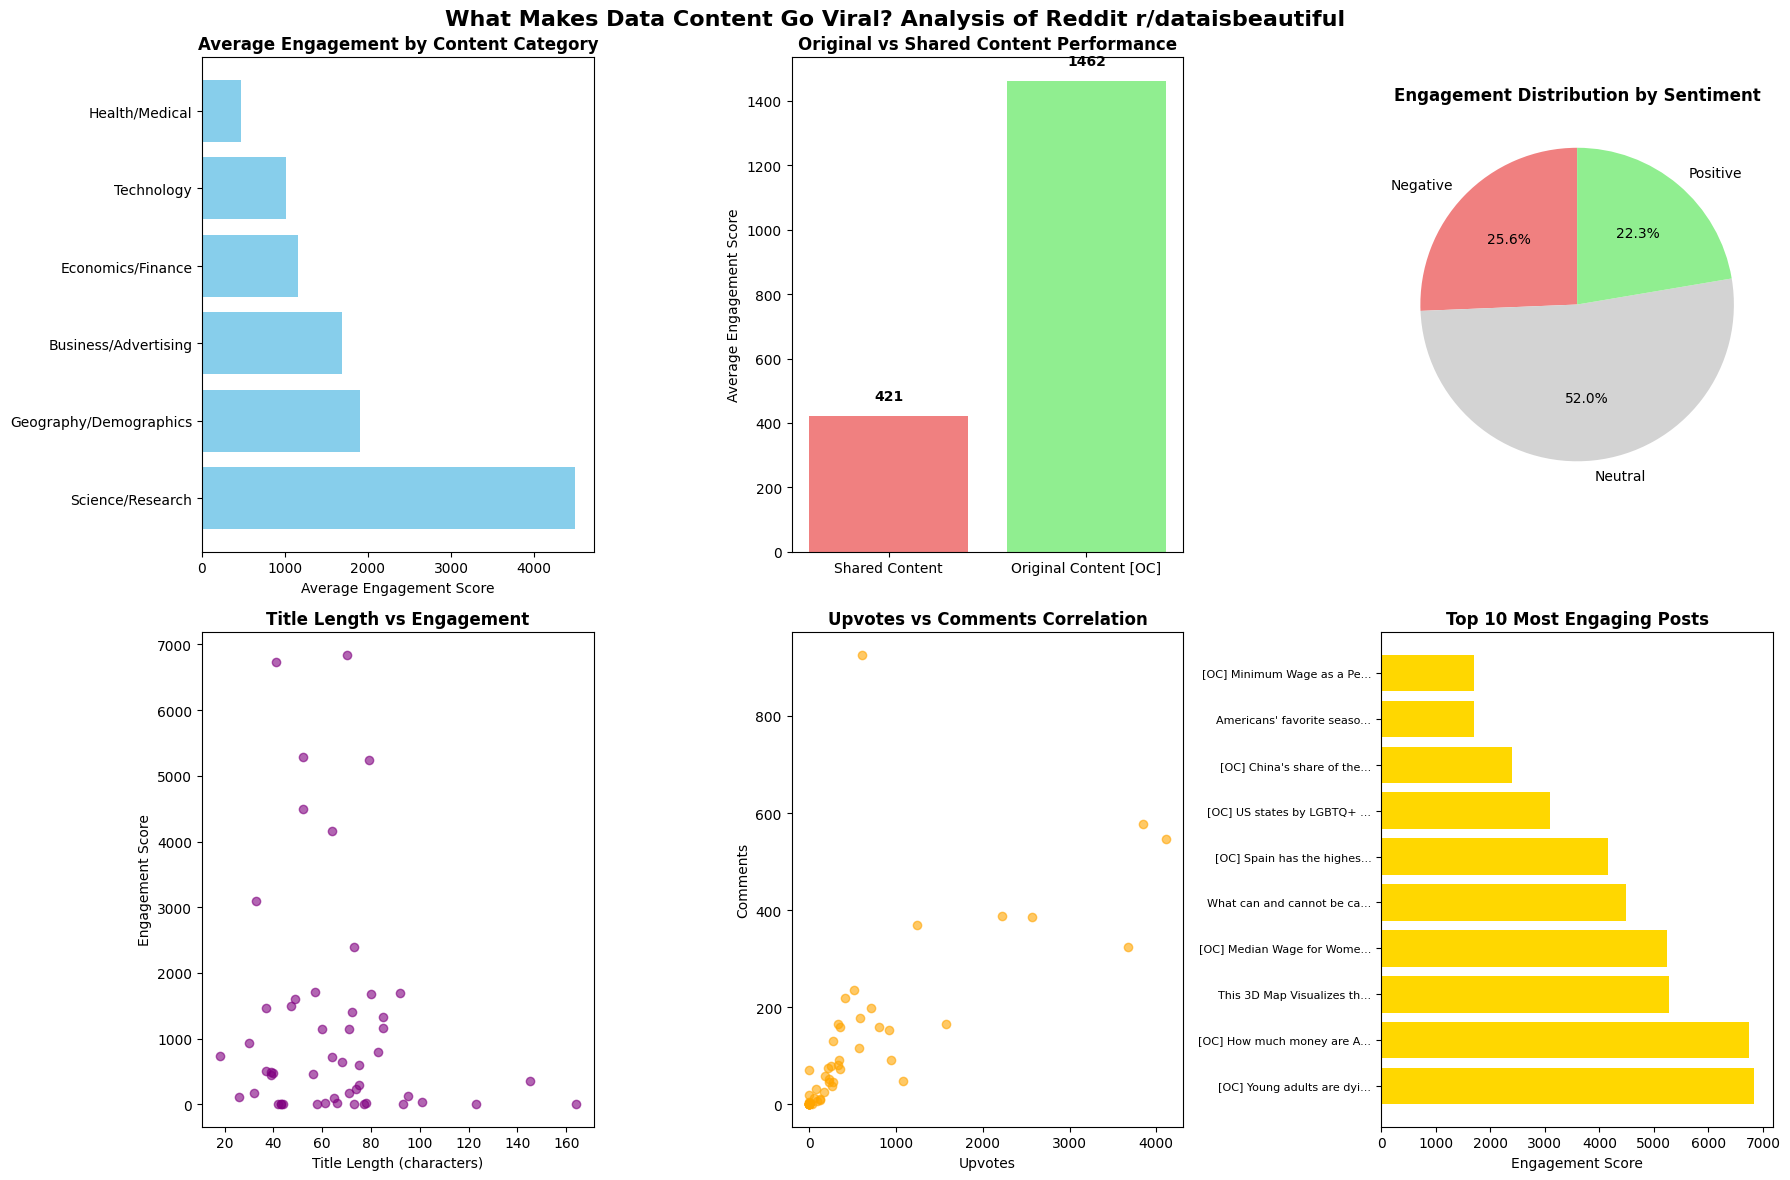

Dashboard saved as 'viral_content_analysis_dashboard.png'


In [41]:
# Cell 27: Lets Set up visualization style and create comprehensive charts
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

# Create a comprehensive dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('What Makes Data Content Go Viral? Analysis of Reddit r/dataisbeautiful', 
             fontsize=16, fontweight='bold', y=0.98)

# 1. Category Performance (Top 6 categories)
top_categories = df.groupby('category')['engagement_score'].mean().nlargest(6)
axes[0,0].barh(range(len(top_categories)), top_categories.values, color='skyblue')
axes[0,0].set_yticks(range(len(top_categories)))
axes[0,0].set_yticklabels(top_categories.index, fontsize=10)
axes[0,0].set_title('Average Engagement by Content Category', fontweight='bold')
axes[0,0].set_xlabel('Average Engagement Score')

# 2. Original vs Shared Content
oc_data = df.groupby('has_oc_tag')['engagement_score'].mean()
oc_labels = ['Shared Content', 'Original Content [OC]']
axes[0,1].bar(oc_labels, oc_data.values, color=['lightcoral', 'lightgreen'])
axes[0,1].set_title('Original vs Shared Content Performance', fontweight='bold')
axes[0,1].set_ylabel('Average Engagement Score')
for i, v in enumerate(oc_data.values):
    axes[0,1].text(i, v + 50, f'{v:.0f}', ha='center', fontweight='bold')

# 3. Sentiment Impact
sentiment_data = df.groupby('sentiment')['engagement_score'].mean()
colors = ['lightcoral', 'lightgray', 'lightgreen']
axes[0,2].pie(sentiment_data.values, labels=sentiment_data.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,2].set_title('Engagement Distribution by Sentiment', fontweight='bold')

# 4. Title Length vs Engagement Scatter
axes[1,0].scatter(df['title_length'], df['engagement_score'], alpha=0.6, color='purple')
axes[1,0].set_xlabel('Title Length (characters)')
axes[1,0].set_ylabel('Engagement Score')
axes[1,0].set_title('Title Length vs Engagement', fontweight='bold')

# 5. Upvotes vs Comments Relationship
axes[1,1].scatter(df['upvotes'], df['comments'], alpha=0.6, color='orange')
axes[1,1].set_xlabel('Upvotes')
axes[1,1].set_ylabel('Comments')
axes[1,1].set_title('Upvotes vs Comments Correlation', fontweight='bold')

# 6. Top 10 Posts by Engagement
top_10_posts = df.nlargest(10, 'engagement_score')
y_pos = range(len(top_10_posts))
axes[1,2].barh(y_pos, top_10_posts['engagement_score'], color='gold')
axes[1,2].set_yticks(y_pos)
axes[1,2].set_yticklabels([title[:25] + '...' if len(title) > 25 else title 
                          for title in top_10_posts['title']], fontsize=8)
axes[1,2].set_title('Top 10 Most Engaging Posts', fontweight='bold')
axes[1,2].set_xlabel('Engagement Score')

plt.tight_layout()
plt.savefig('viral_content_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("Dashboard saved as 'viral_content_analysis_dashboard.png'")